# Covid-19 Data Analysis India

### Importing the libraries

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly
import plotly.express as px
import plotly.graph_objects as go
import folium
from folium import plugins

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

In [2]:
df_india= pd.read_csv('covid_19_India.csv')
india_coord = pd.read_excel('Indian Coordinates.xlsx')

In [3]:
df_india.head()

Sno      Date     Time State/UnionTerritory ConfirmedIndianNational  \
0    1  30/01/20  6:00 PM               Kerala                       1   
1    2  31/01/20  6:00 PM               Kerala                       1   
2    3  01/02/20  6:00 PM               Kerala                       2   
3    4  02/02/20  6:00 PM               Kerala                       3   
4    5  03/02/20  6:00 PM               Kerala                       3   

  ConfirmedForeignNational  Cured  Deaths  Confirmed  
0                        0      0       0          1  
1                        0      0       0          1  
2                        0      0       0          2  
3                        0      0       0          3  
4                        0      0       0          3

In [4]:
df_india.tail()

Sno      Date     Time              State/UnionTerritory  \
2445  2446  29/05/20  8:00 AM                           Tripura   
2446  2447  29/05/20  8:00 AM                       Uttarakhand   
2447  2448  29/05/20  8:00 AM                     Uttar Pradesh   
2448  2449  29/05/20  8:00 AM                       West Bengal   
2449  2450  29/05/20  8:00 AM  Cases being reassigned to states   

     ConfirmedIndianNational ConfirmedForeignNational  Cured  Deaths  \
2445                       -                        -    165       0   
2446                       -                        -     79       4   
2447                       -                        -   3991     182   
2448                       -                        -   1578     289   
2449                       -                        -      0       0   

      Confirmed  
2445        230  
2446        469  
2447       6991  
2448       4192  
2449       4332

In [5]:
df_india.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2450 entries, 0 to 2449
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Sno                       2450 non-null   int64 
 1   Date                      2450 non-null   object
 2   Time                      2450 non-null   object
 3   State/UnionTerritory      2450 non-null   object
 4   ConfirmedIndianNational   2450 non-null   object
 5   ConfirmedForeignNational  2450 non-null   object
 6   Cured                     2450 non-null   int64 
 7   Deaths                    2450 non-null   int64 
 8   Confirmed                 2450 non-null   int64 
dtypes: int64(4), object(5)
memory usage: 172.4+ KB


In [6]:
df_india.rename(columns={'State/UnionTerritory' : 'states'}, inplace=True)
df_india.columns = map(str.lower, df_india.columns)
df_india.columns

Index(['sno', 'date', 'time', 'states', 'confirmedindiannational',
       'confirmedforeignnational', 'cured', 'deaths', 'confirmed'],
      dtype='object')

In [7]:
def replace_dash_with_zeros(inp):
    return int(inp.replace("-","0"))

df_india.drop(['sno'],axis=1,inplace=True)
df_india['date'] = pd.to_datetime(df_india['date'], format = "%d/%m/%y")
df_india['confirmedindiannational'] = df_india['confirmedindiannational'].apply(replace_dash_with_zeros)
df_india['confirmedforeignnational'] = df_india['confirmedforeignnational'].apply(replace_dash_with_zeros)
df_india.sort_values("confirmed", ascending = False, inplace = True)
df_india

date     time       states  confirmedindiannational  \
2397 2020-05-28  8:00 AM  Maharashtra                        0   
2433 2020-05-29  8:00 AM  Maharashtra                        0   
2361 2020-05-27  8:00 AM  Maharashtra                        0   
2325 2020-05-26  8:00 AM  Maharashtra                        0   
2290 2020-05-25  8:00 AM  Maharashtra                        0   
...         ...      ...          ...                      ...   
1047 2020-04-17  5:00 PM     Nagaland                        0   
1179 2020-04-21  5:00 PM     Nagaland                        0   
981  2020-04-15  5:00 PM     Nagaland                        0   
1113 2020-04-19  5:00 PM     Nagaland                        0   
1014 2020-04-16  5:00 PM     Nagaland                        0   

      confirmedforeignnational  cured  deaths  confirmed  
2397                         0  17918    1897      56948  
2433                         0  17918    1897      56948  
2361                         0  16954    1792      54758  
2325                         0  15786    1695      52667  
2290                         0  14600    1635      50231  
...                        ...    ...     ...        ...  
1047                         0      0       0          0  
1179                         0      0       0          0  
981                          0      0       0          0  
1113                         0      0       0          0  
1014                         0      0       0          0  

[2450 rows x 8 columns]

In [8]:
list(zip(df_india.columns,df_india.dtypes,df_india.isna().sum()))

[('date', dtype('<M8[ns]'), 0),
 ('time', dtype('O'), 0),
 ('states', dtype('O'), 0),
 ('confirmedindiannational', dtype('int64'), 0),
 ('confirmedforeignnational', dtype('int64'), 0),
 ('cured', dtype('int64'), 0),
 ('deaths', dtype('int64'), 0),
 ('confirmed', dtype('int64'), 0)]

In [9]:
df_india.groupby(["states", "date"]).sum()

confirmedindiannational  \
states                      date                                  
Andaman and Nicobar Islands 2020-03-26                        1   
                            2020-03-27                        1   
                            2020-03-28                        6   
                            2020-03-29                        0   
                            2020-03-30                        0   
...                                                         ...   
West Bengal                 2020-05-25                        0   
                            2020-05-26                        0   
                            2020-05-27                        0   
                            2020-05-28                        0   
                            2020-05-29                        0   

                                        confirmedforeignnational  cured  \
states                      date                                          
Andaman and Nicobar Islands 2020-03-26                         0      0   
                            2020-03-27                         0      0   
                            2020-03-28                         0      0   
                            2020-03-29                         0      0   
                            2020-03-30                         0      0   
...                                                          ...    ...   
West Bengal                 2020-05-25                         0   1339   
                            2020-05-26                         0   1414   
                            2020-05-27                         0   1486   
                            2020-05-28                         0   1578   
                            2020-05-29                         0   1578   

                                        deaths  confirmed  
states                      date                           
Andaman and Nicobar Islands 2020-03-26       0          1  
                            2020-03-27       0          1  
                            2020-03-28       0          6  
                            2020-03-29       0          9  
                            2020-03-30       0          9  
...                                        ...        ...  
West Bengal                 2020-05-25     272       3667  
                            2020-05-26     278       3816  
                            2020-05-27     283       4009  
                            2020-05-28     289       4192  
                            2020-05-29     289       4192  

[2450 rows x 5 columns]

In [10]:
states = df_india['states'].unique().tolist()
states

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'Cases being reassigned to states',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Unassigned',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [11]:
states.remove("Cases being reassigned to states")
states.remove("Unassigned")
states

['Maharashtra',
 'Tamil Nadu',
 'Delhi',
 'Gujarat',
 'Rajasthan',
 'Madhya Pradesh',
 'Uttar Pradesh',
 'West Bengal',
 'Andhra Pradesh',
 'Bihar',
 'Karnataka',
 'Punjab',
 'Telengana',
 'Jammu and Kashmir',
 'Odisha',
 'Haryana',
 'Kerala',
 'Assam',
 'Uttarakhand',
 'Jharkhand',
 'Chhattisgarh',
 'Chandigarh',
 'Himachal Pradesh',
 'Tripura',
 'Goa',
 'Ladakh',
 'Puducherry',
 'Manipur',
 'Andaman and Nicobar Islands',
 'Meghalaya',
 'Nagaland',
 'Arunachal Pradesh',
 'Dadar Nagar Haveli',
 'Sikkim',
 'Mizoram']

In [12]:
len(states)

35

## Merging Data Frames

In [13]:
df_final_india = pd.DataFrame()
dates = pd.DataFrame({"date": pd.date_range(df_india.date.min(),df_india.date.max())})
for state in states:
    all_dates_df = pd.merge(dates, 
                            df_india.loc[df_india['states'] == state,:], on = "date",
                           how = "left")
    all_dates_df['states'] = state
    all_dates_df = all_dates_df.fillna(0)
    all_dates_df['new_cases'] = all_dates_df['confirmed'] - all_dates_df['confirmed'].shift(1)
    df_final_india = pd.concat([df_final_india, all_dates_df],axis = 0)
print("Finally we have a data of Size: ",df_final_india.shape)
df_final_india.head()

Finally we have a data of Size:  (4235, 9)


date time       states  confirmedindiannational  \
0 2020-01-30    0  Maharashtra                      0.0   
1 2020-01-31    0  Maharashtra                      0.0   
2 2020-02-01    0  Maharashtra                      0.0   
3 2020-02-02    0  Maharashtra                      0.0   
4 2020-02-03    0  Maharashtra                      0.0   

   confirmedforeignnational  cured  deaths  confirmed  new_cases  
0                       0.0    0.0     0.0        0.0        NaN  
1                       0.0    0.0     0.0        0.0        0.0  
2                       0.0    0.0     0.0        0.0        0.0  
3                       0.0    0.0     0.0        0.0        0.0  
4                       0.0    0.0     0.0        0.0        0.0

In [14]:
df_final_india.dropna(inplace = True)
df_final_india.shape

(4200, 9)

In [15]:
del df_final_india['time']
del df_final_india['confirmedindiannational']
del df_final_india['confirmedforeignnational']

In [16]:
df_final_india

date       states  cured  deaths  confirmed  new_cases
1   2020-01-31  Maharashtra    0.0     0.0        0.0        0.0
2   2020-02-01  Maharashtra    0.0     0.0        0.0        0.0
3   2020-02-02  Maharashtra    0.0     0.0        0.0        0.0
4   2020-02-03  Maharashtra    0.0     0.0        0.0        0.0
5   2020-02-04  Maharashtra    0.0     0.0        0.0        0.0
..         ...          ...    ...     ...        ...        ...
116 2020-05-25      Mizoram    1.0     0.0        1.0        0.0
117 2020-05-26      Mizoram    1.0     0.0        1.0        0.0
118 2020-05-27      Mizoram    1.0     0.0        1.0        0.0
119 2020-05-28      Mizoram    1.0     0.0        1.0        0.0
120 2020-05-29      Mizoram    1.0     0.0        1.0        0.0

[4200 rows x 6 columns]

In [17]:
df_final_india = df_final_india.groupby(["states", "date"]).sum().reset_index()
df_final_india

states       date   cured  deaths  confirmed  \
0     Andaman and Nicobar Islands 2020-01-31     0.0     0.0        0.0   
1     Andaman and Nicobar Islands 2020-02-01     0.0     0.0        0.0   
2     Andaman and Nicobar Islands 2020-02-02     0.0     0.0        0.0   
3     Andaman and Nicobar Islands 2020-02-03     0.0     0.0        0.0   
4     Andaman and Nicobar Islands 2020-02-04     0.0     0.0        0.0   
...                           ...        ...     ...     ...        ...   
4195                  West Bengal 2020-05-25  1339.0   272.0     3667.0   
4196                  West Bengal 2020-05-26  1414.0   278.0     3816.0   
4197                  West Bengal 2020-05-27  1486.0   283.0     4009.0   
4198                  West Bengal 2020-05-28  1578.0   289.0     4192.0   
4199                  West Bengal 2020-05-29  1578.0   289.0     4192.0   

      new_cases  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  
...         ...  
4195      208.0  
4196      149.0  
4197      193.0  
4198      183.0  
4199        0.0  

[4200 rows x 6 columns]

## Statewise Covid19 Status in India

In [18]:
def plot_pie(active,cured,death,title):
    labels = ['Active','Recovered','Died']
    sizes = [active,cured,death]
    color= ['#66b3ff','green','red']
    explode = []

    for i in labels:
        explode.append(0.05)
    
    plt.figure(figsize= (15,6))
    plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=9, explode =explode,colors = color)
    centre_circle = plt.Circle((0,0),0.70,fc='white')

    fig = plt.gcf()
    fig.gca().add_artist(centre_circle)
    plt.title(title +  'COVID-19 Cases',fontsize = 20)
    plt.axis('equal')  
    plt.tight_layout()

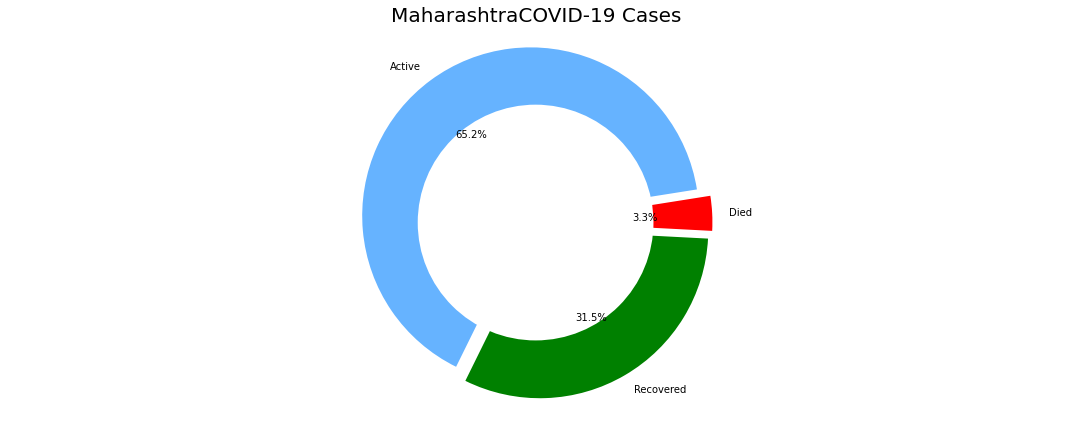

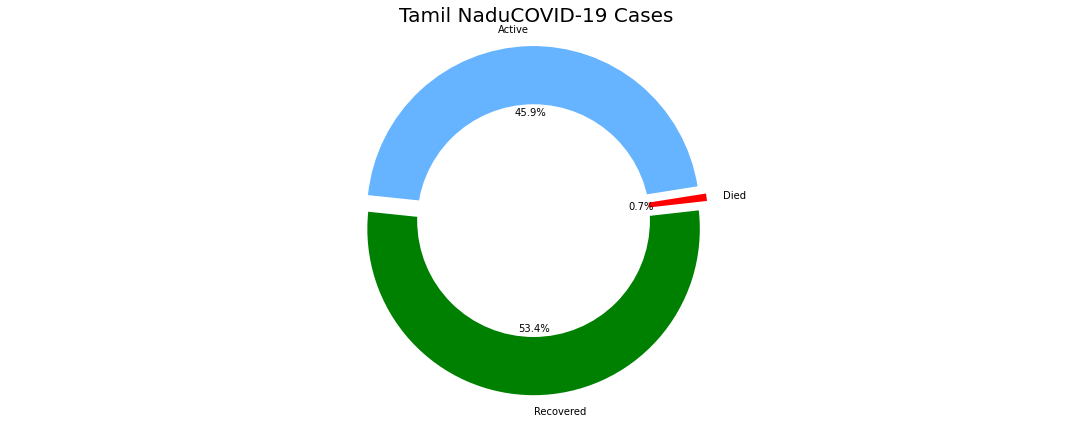

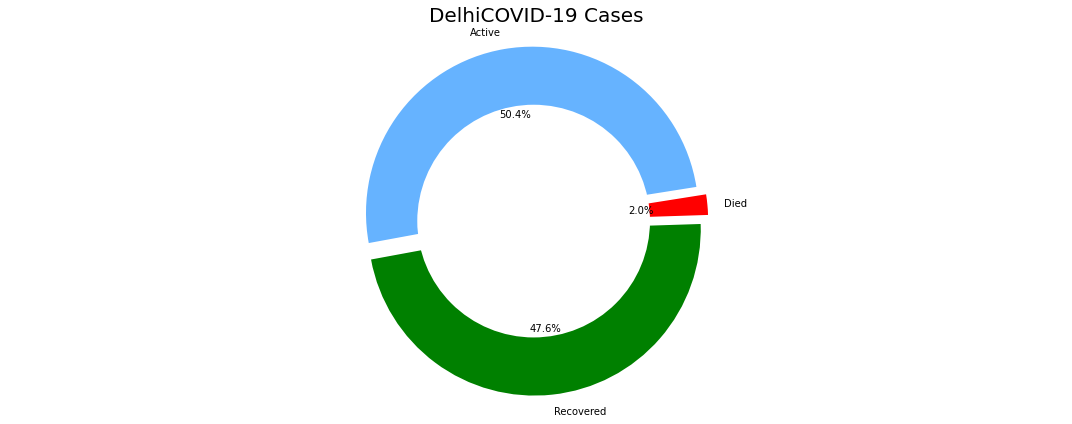

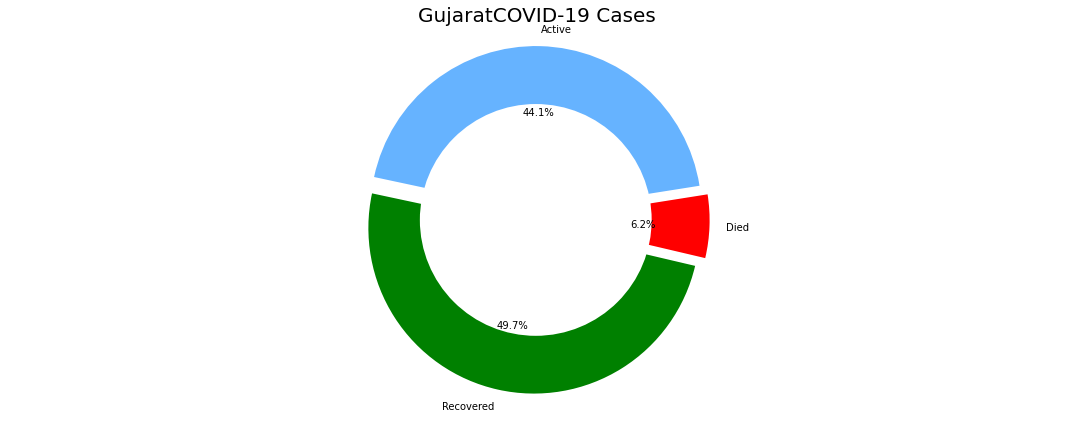

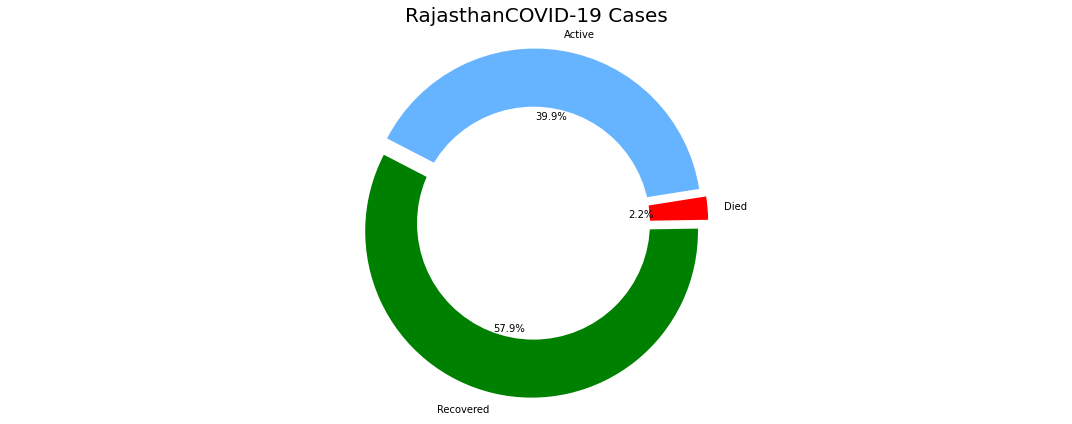

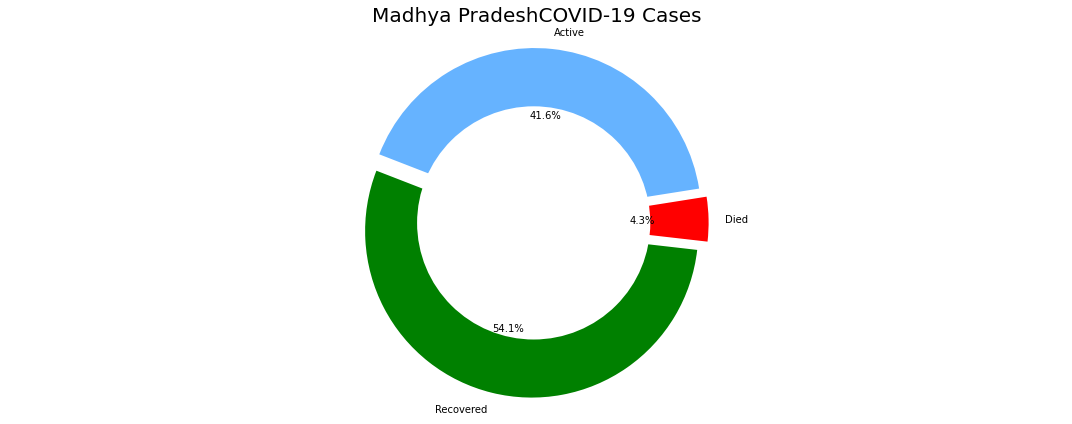

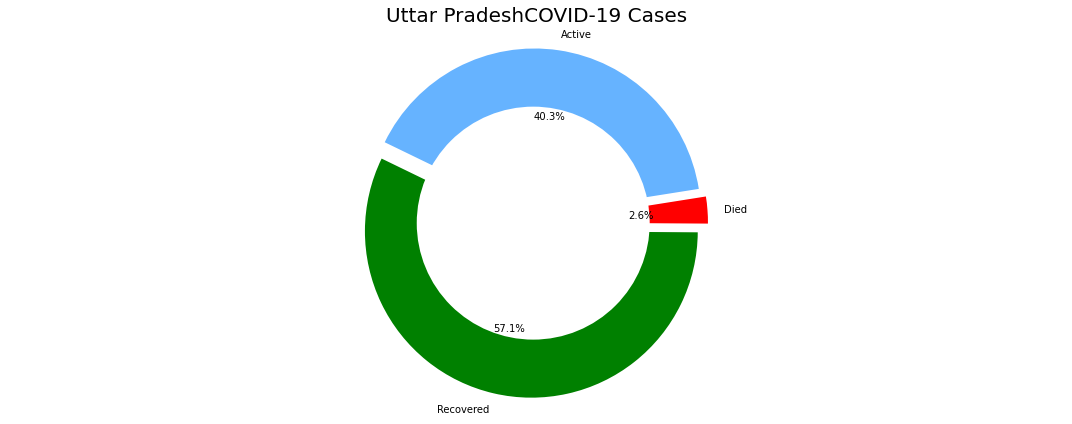

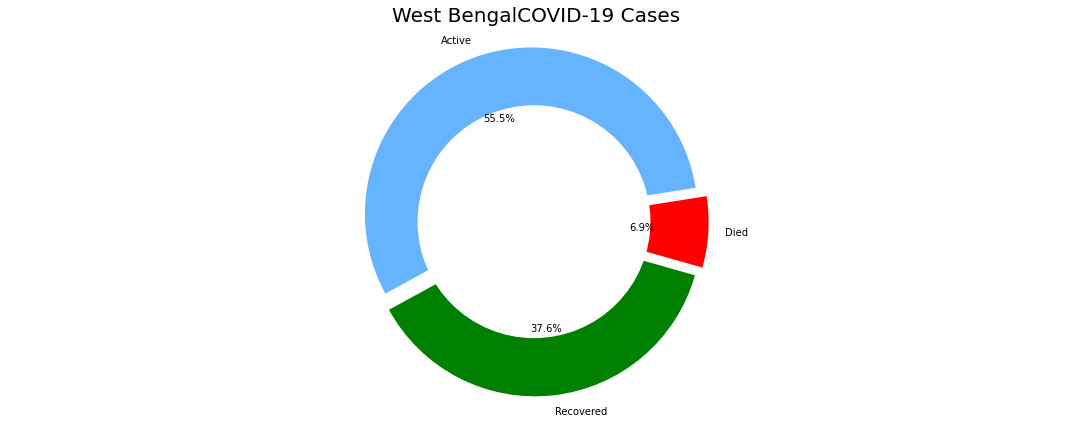

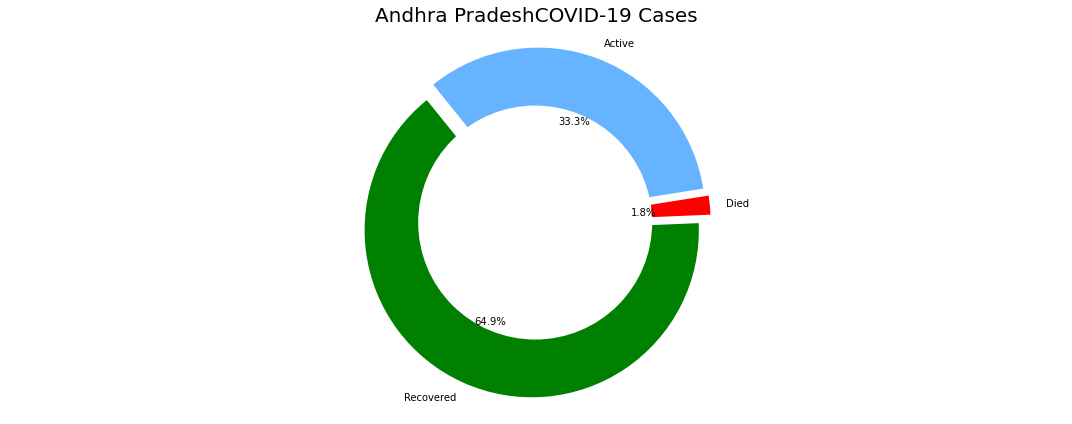

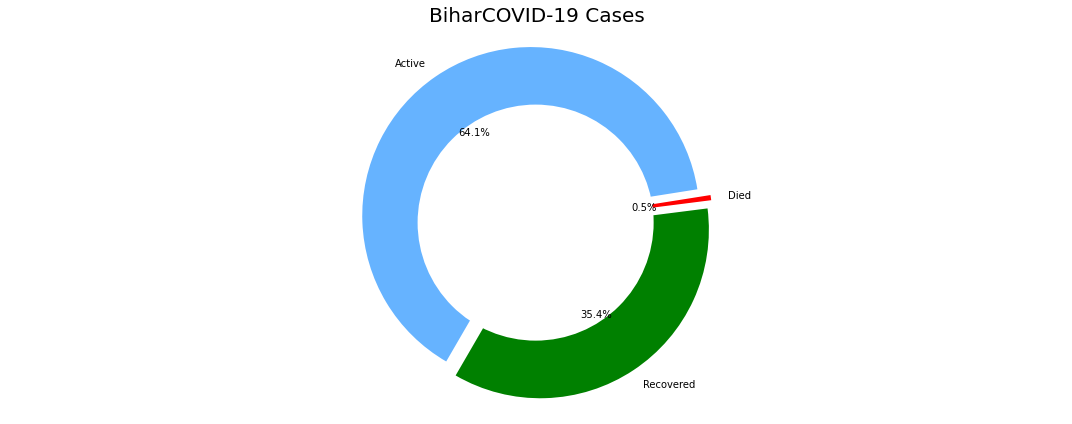

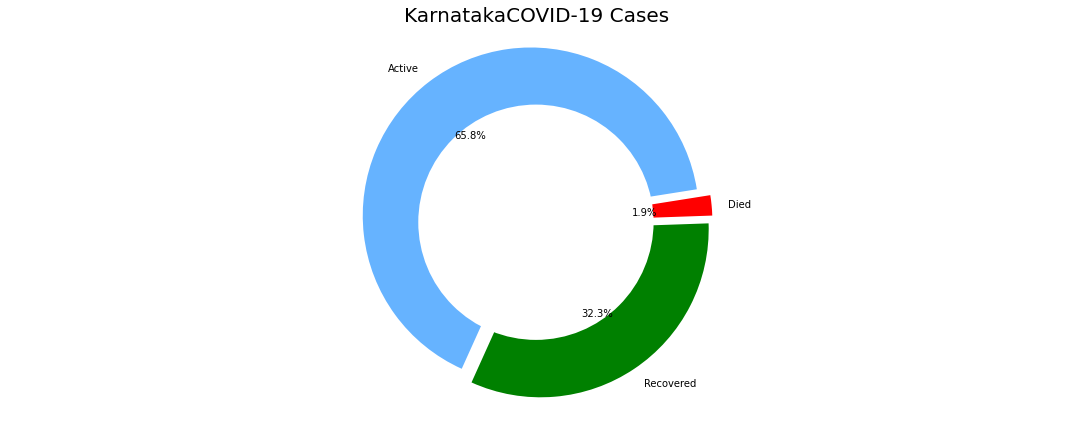

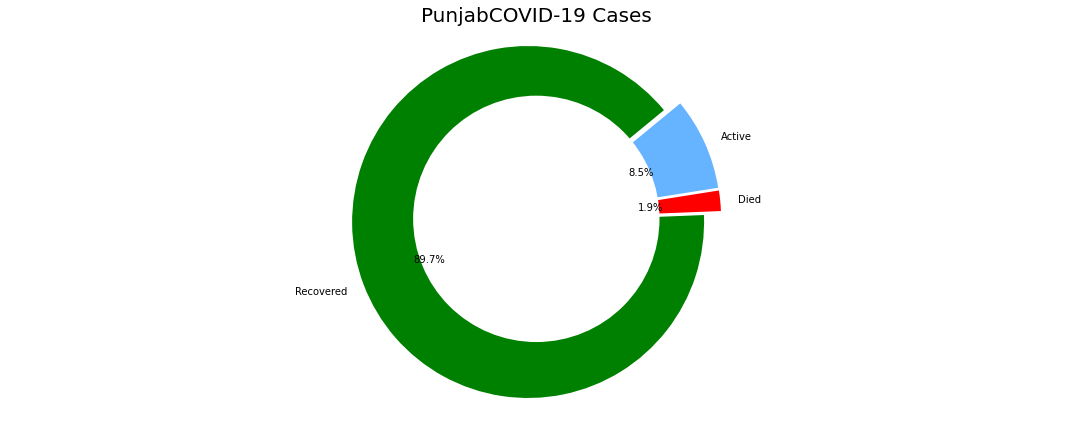

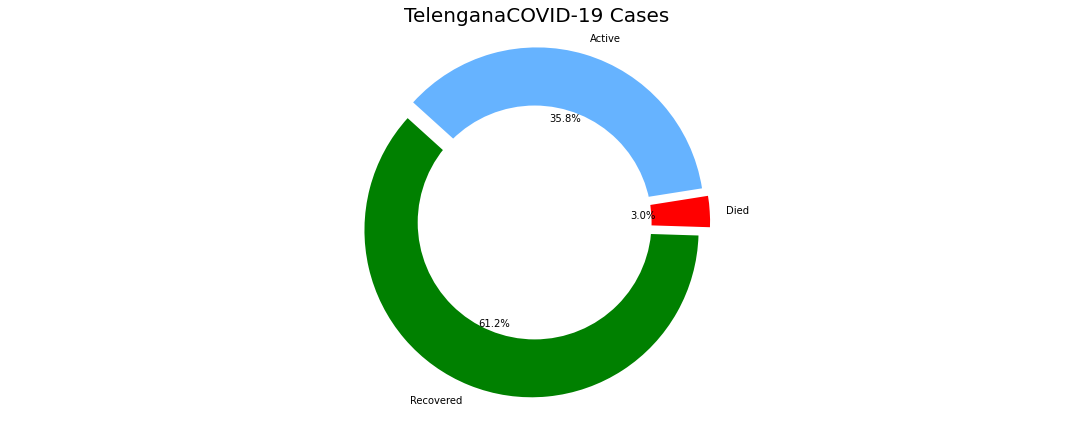

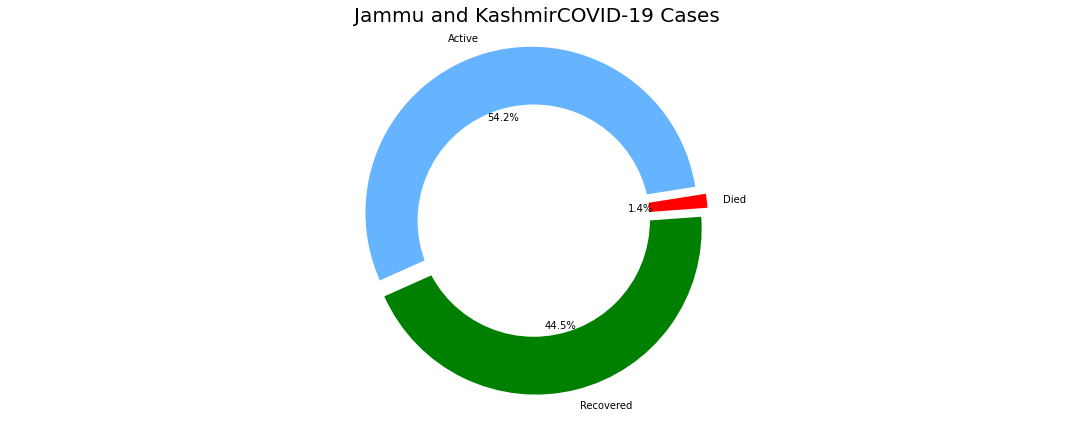

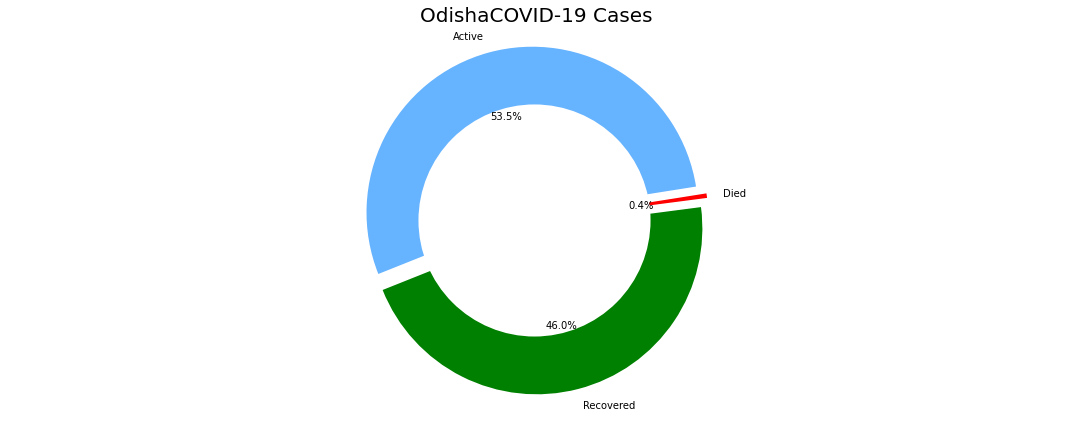

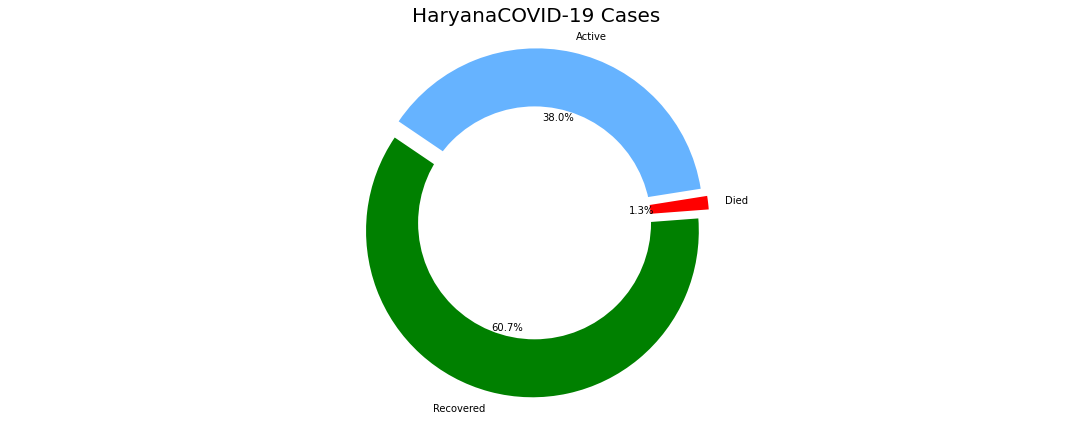

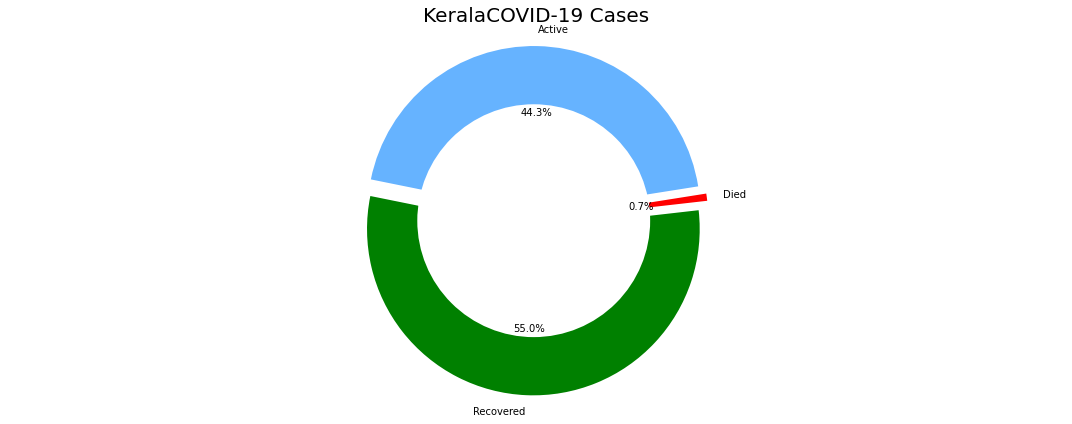

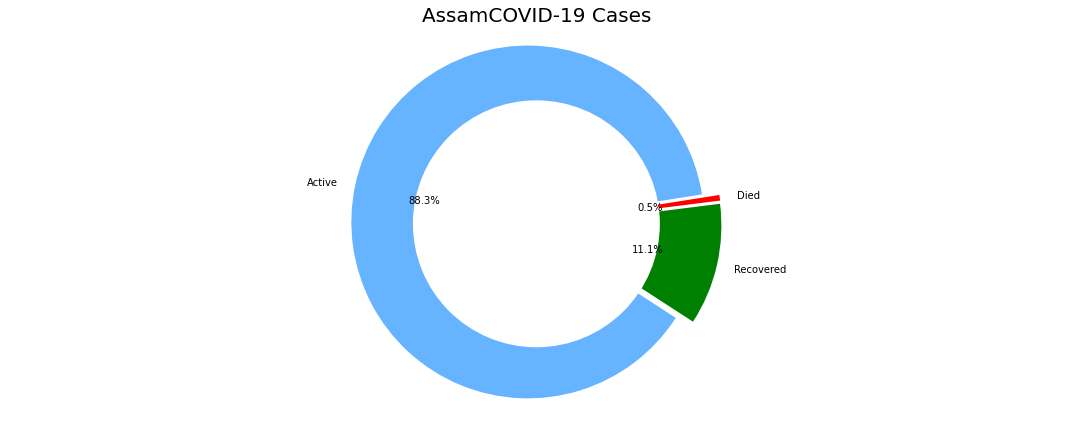

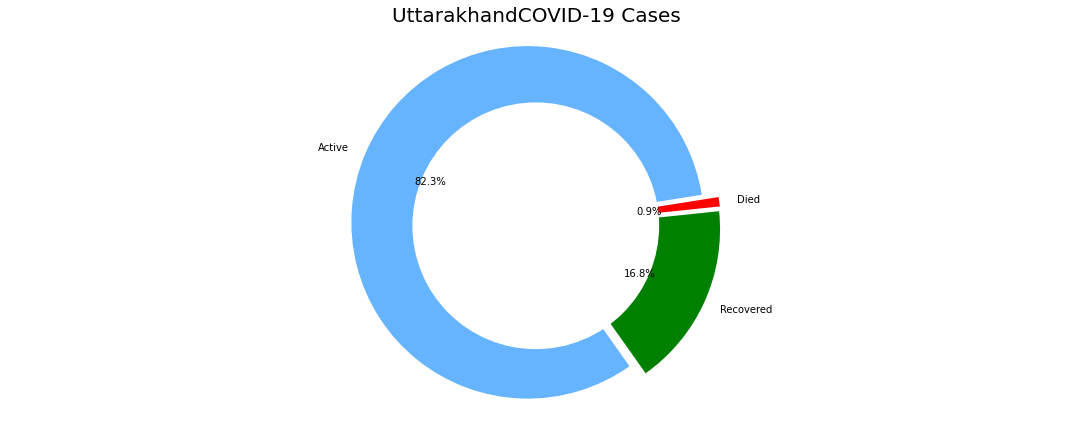

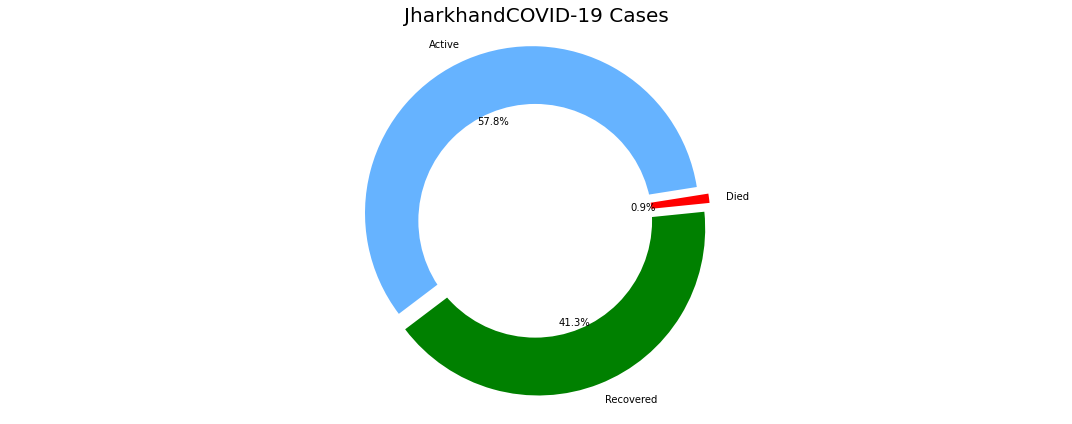

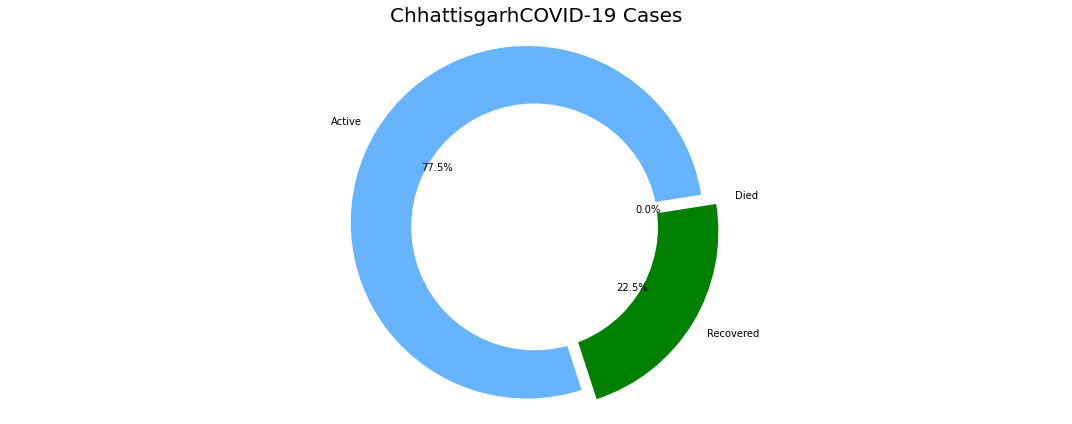

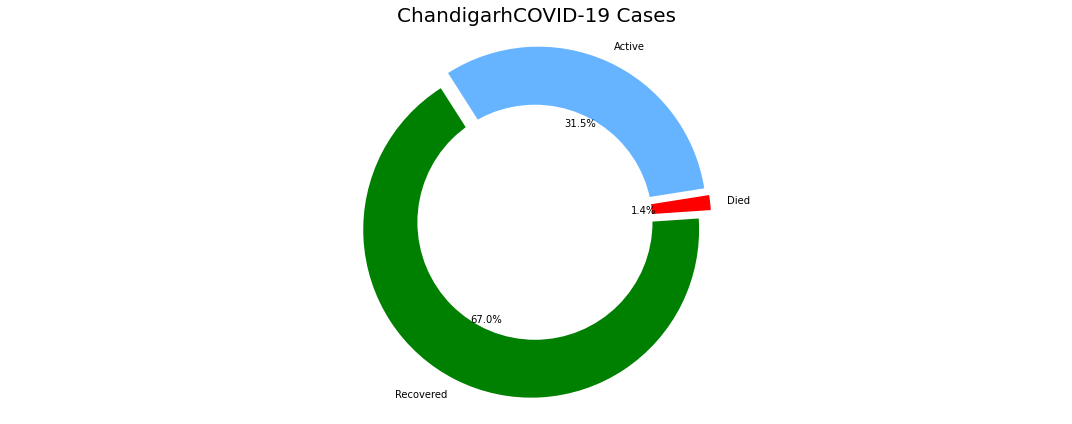

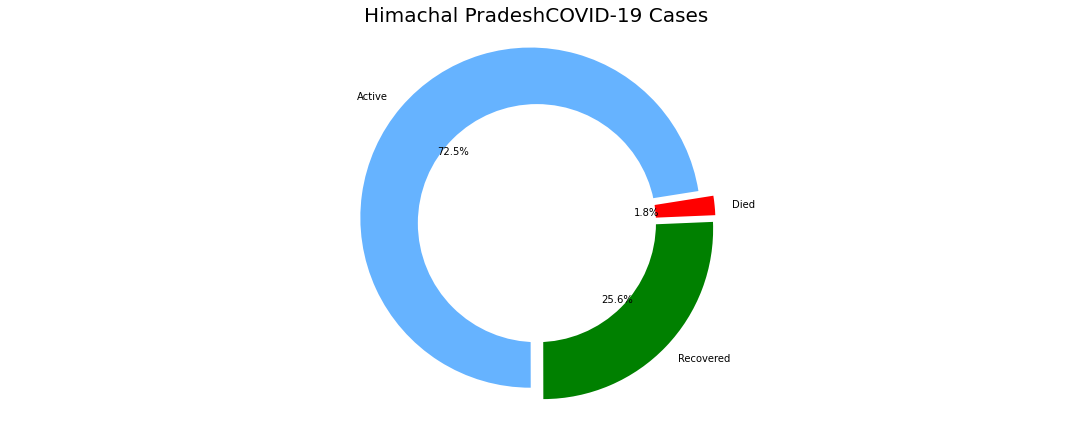

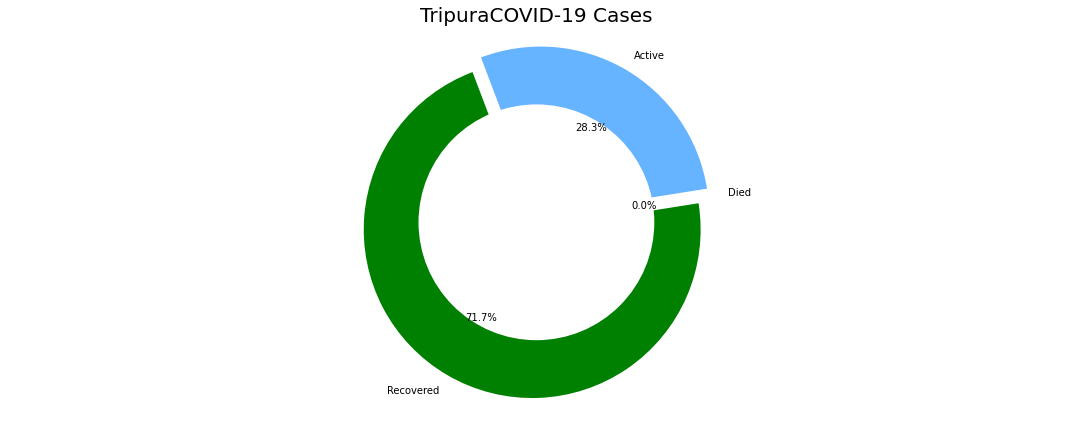

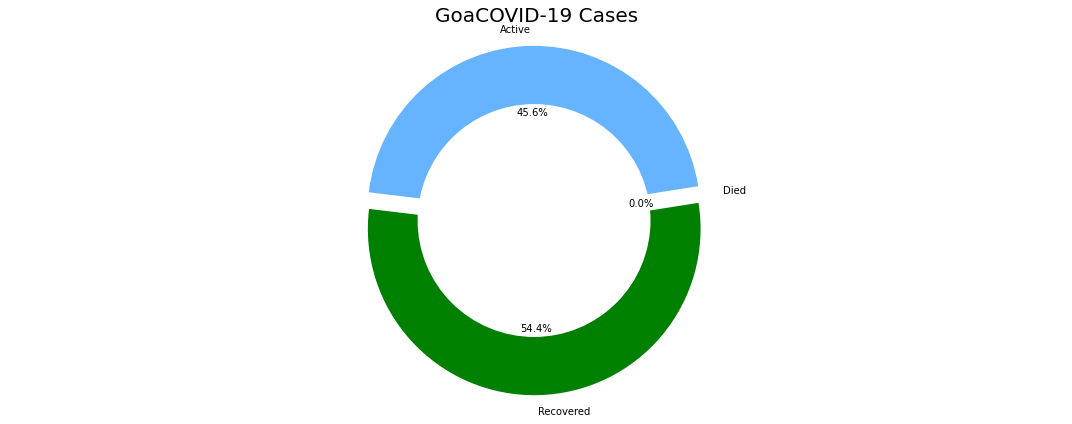

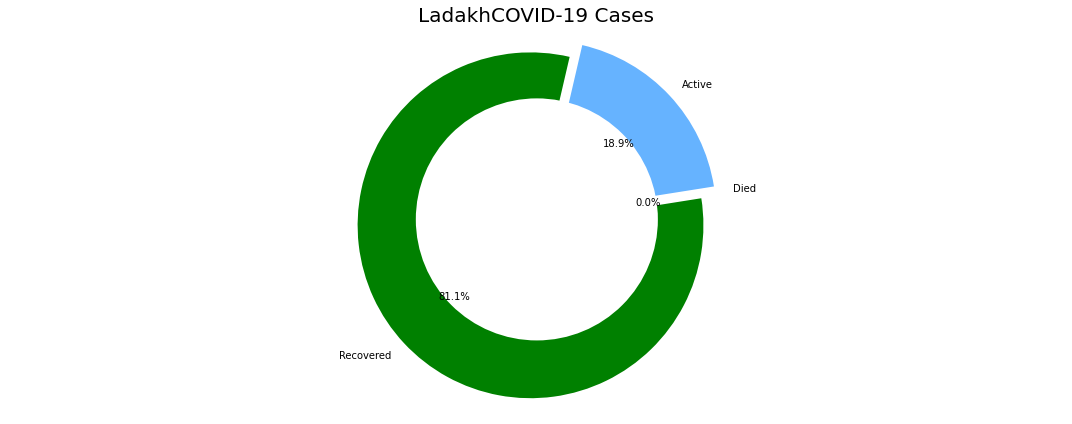

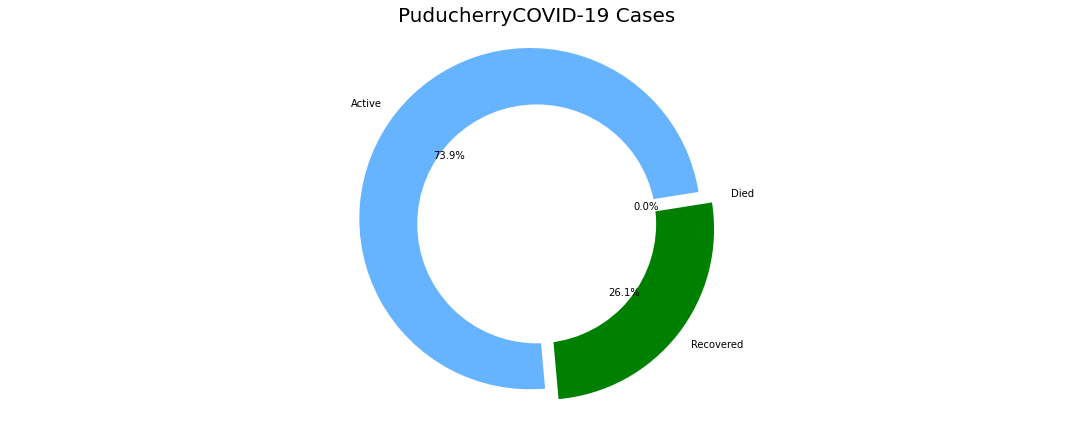

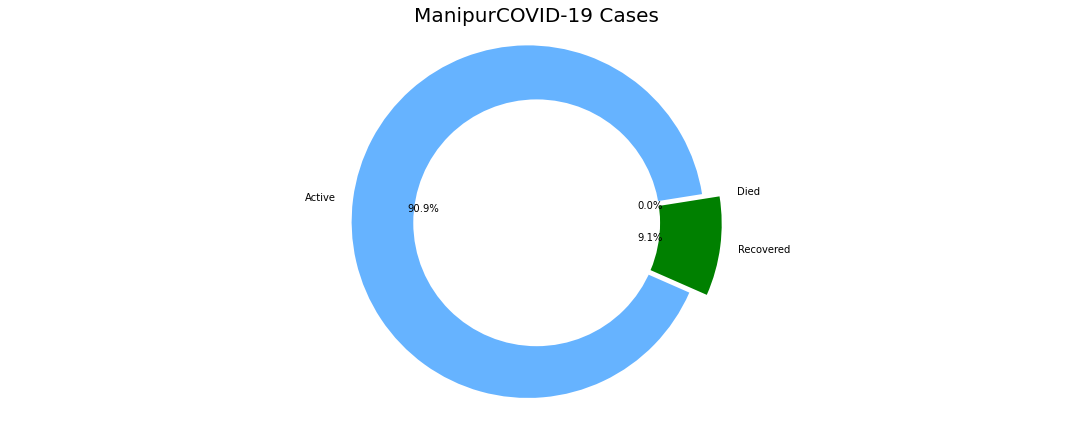

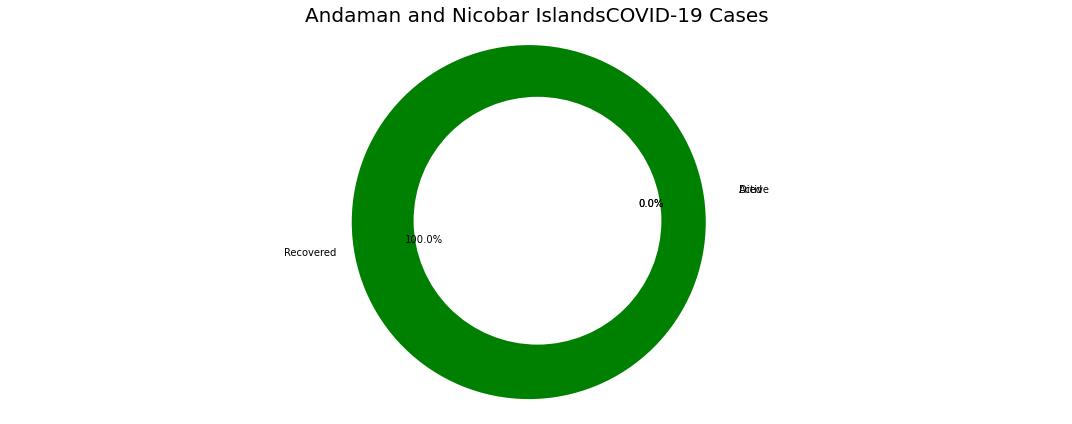

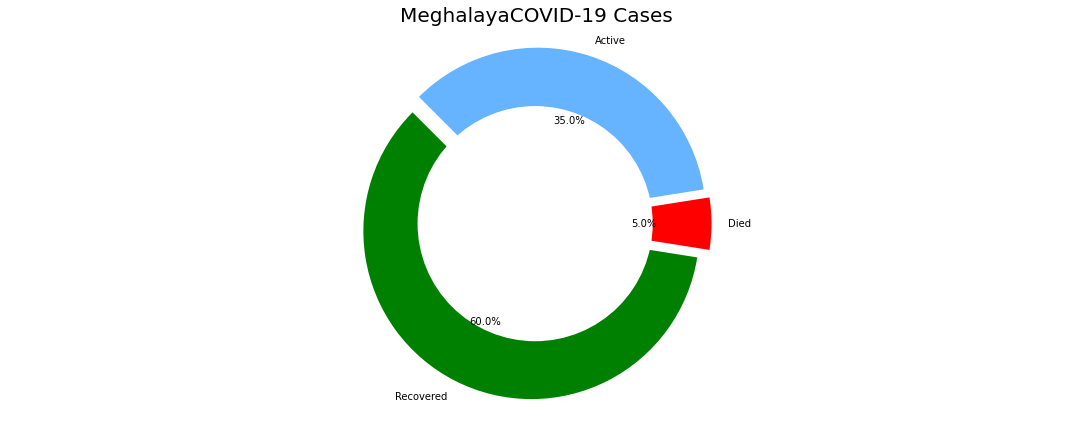

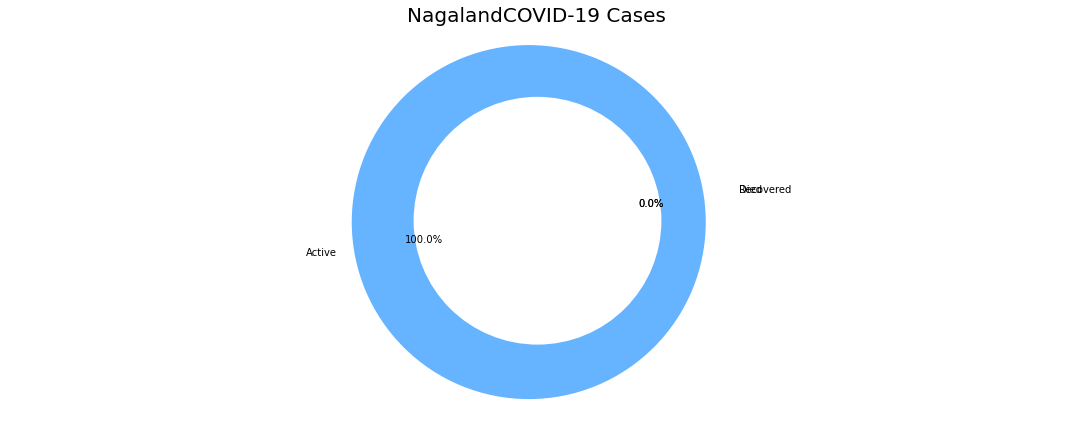

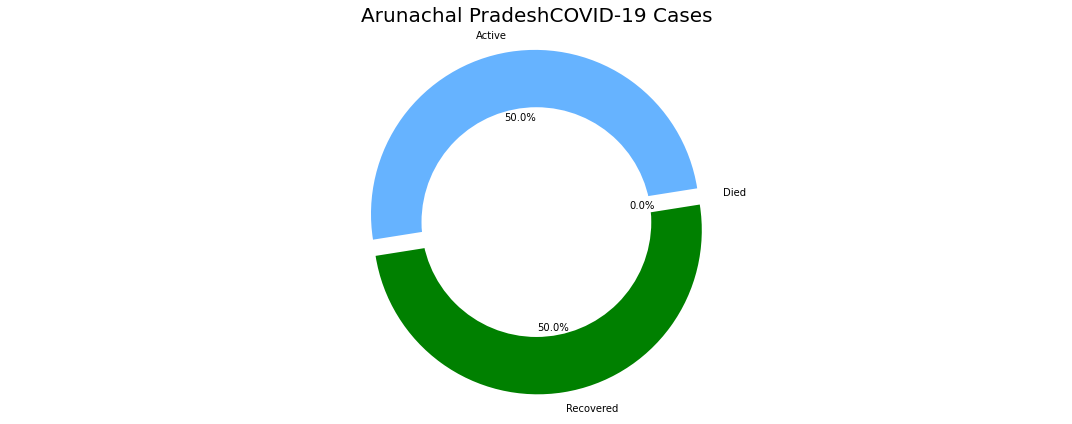

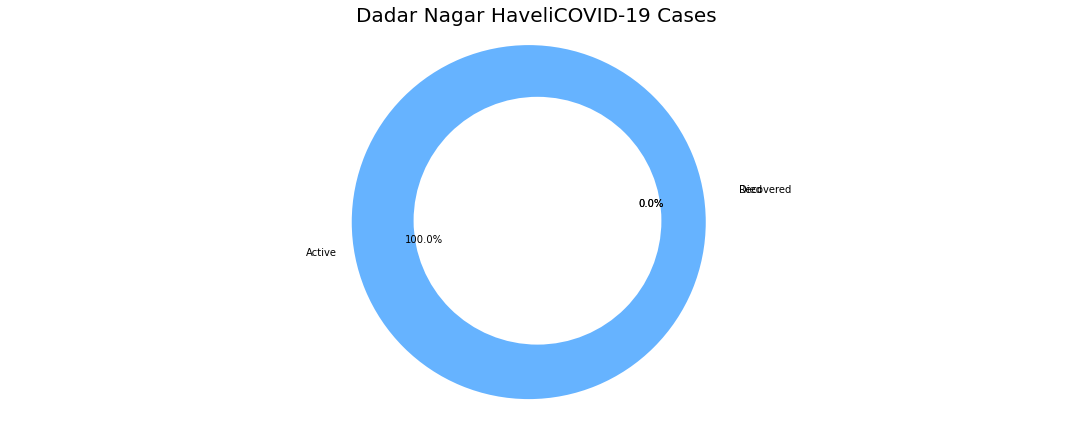

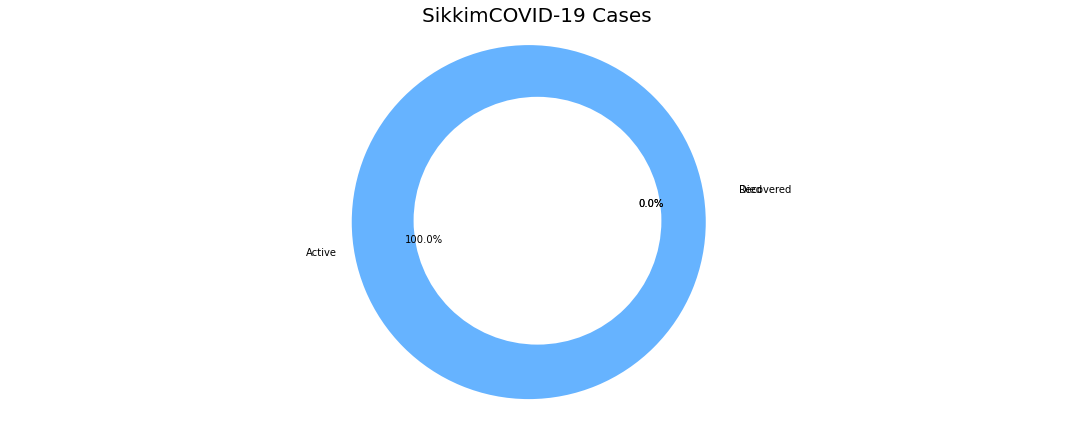

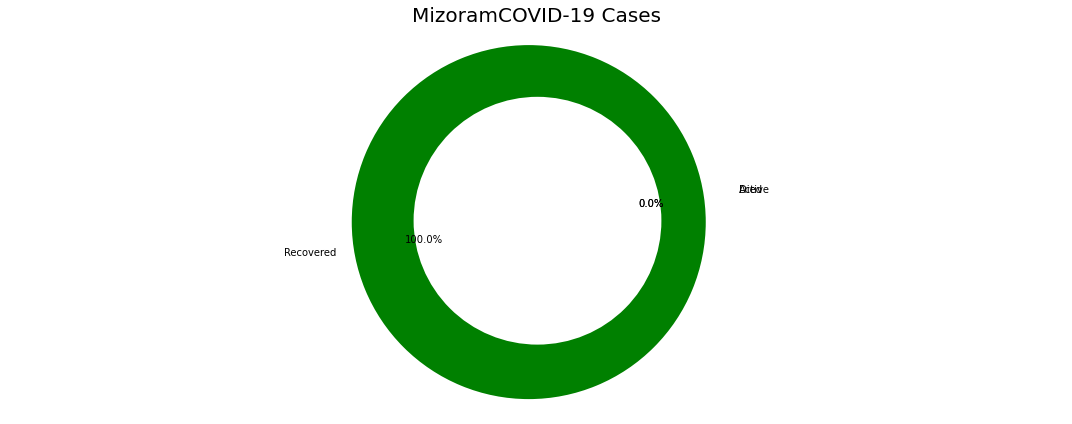

In [19]:
total_cases_india = 0
cured_cases_india = 0
death_cases_india = 0
active_cases_india = 0
state_df = pd.DataFrame()

for state in states:
    one_state_df = df_final_india.loc[df_final_india['states'] == state,:]
    state_df = pd.concat([state_df,pd.DataFrame(one_state_df.iloc[-1,:]).T],axis = 0)
    total_cases = one_state_df['confirmed'].values[-1]
    cured = one_state_df['cured'].values[-1]
    deaths = one_state_df['deaths'].values[-1]
    active = total_cases - cured - deaths
    plot_pie(active, cured, deaths,state)
    total_cases_india += total_cases
    cured_cases_india += cured
    death_cases_india += deaths
    active_cases_india += active

In [20]:
state_df.reset_index(inplace = True,drop = True)
state_df.head()

states       date  cured deaths confirmed new_cases
0  Maharashtra 2020-05-29  17918   1897     56948         0
1   Tamil Nadu 2020-05-29   9909    133     18545         0
2        Delhi 2020-05-29   7264    303     15257         0
3      Gujarat 2020-05-29   7549    938     15195         0
4    Rajasthan 2020-05-29   4457    173      7703         0

### Bar-plot showing state-wise confirmed and cured cases with percentages

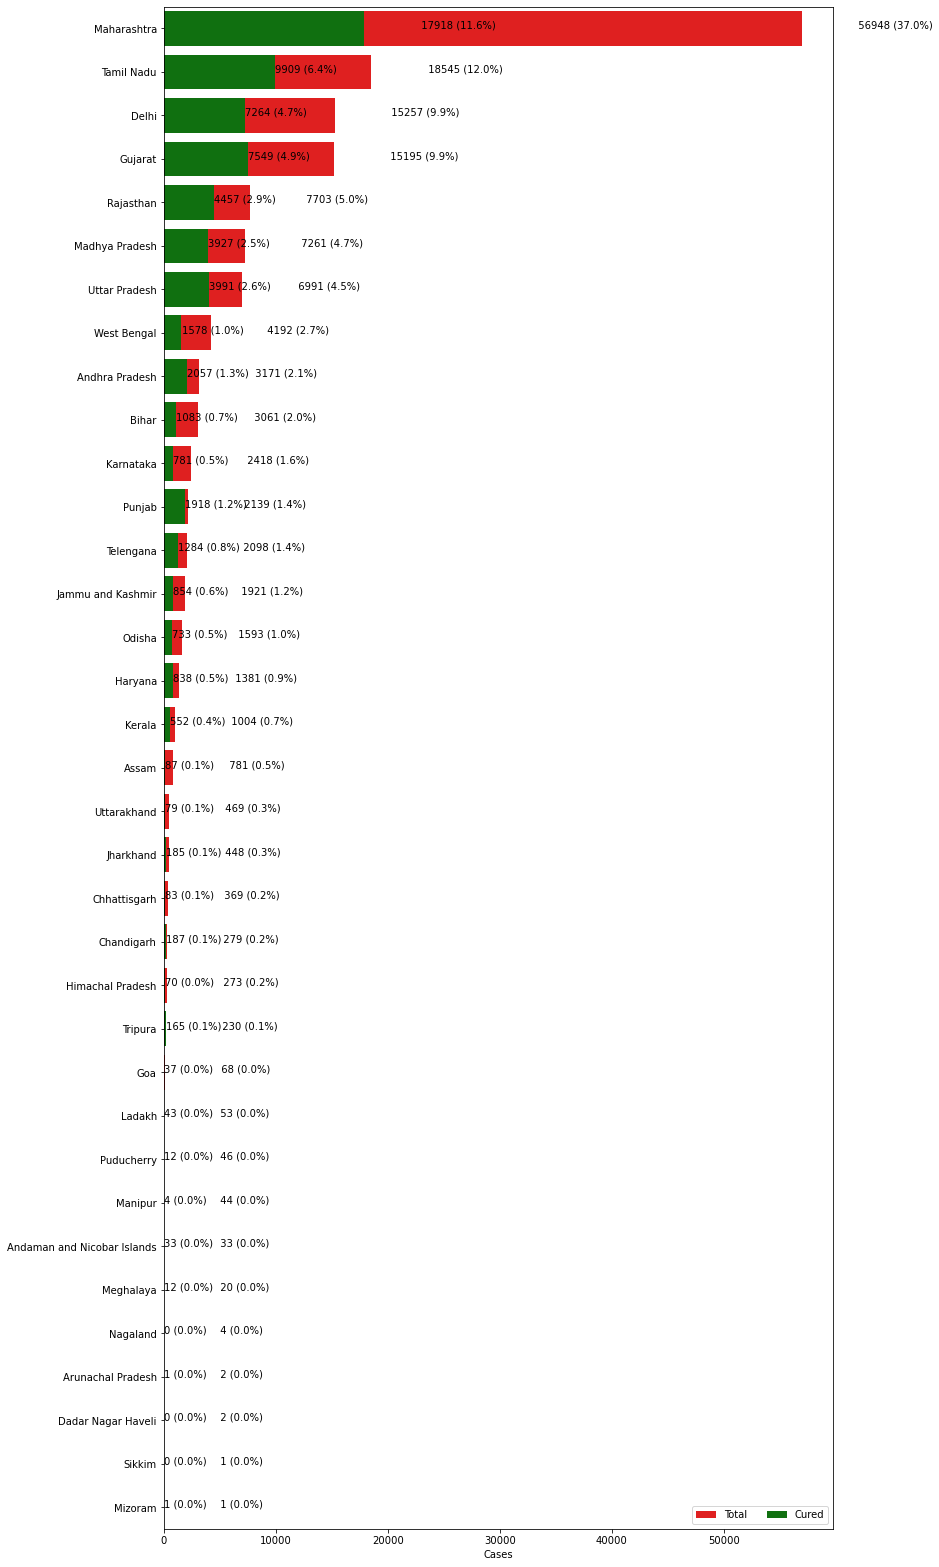

In [21]:
f, ax = plt.subplots(figsize=(12, 28))
data = state_df[['states','confirmed','cured','deaths']]
data.sort_values('confirmed',ascending=False,inplace=True)
sns.set_color_codes("pastel")
sns.barplot(x="confirmed", y="states", data=data,label="Total", color="red")
sns.set_color_codes("muted")
sns.barplot(x="cured", y="states", data=data, label="Cured", color="green")
ax.legend(ncol=5, loc="lower right", frameon=True)
ax.set(ylabel="",xlabel="Cases")
total = total_cases_india
i = 0

for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_width()/total)
    x = p.get_x() + p.get_width() + 3
    y = p.get_y() + p.get_height()/2
    if i <= len(states):
        ax.annotate(" "*18 + str(int(p.get_width())) + ' (' + str(percentage) + ')', (x, y))
    else:
        ax.annotate(str(int(p.get_width())) + ' (' + str(percentage) + ')', (x, y))
        
    i += 1

## Overall Covid19 Status in India

Total infected cases in India:  154001.0
Total cured cases in India:  67692.0
Total active cases in India:  81778.0
Total death cases in India:  4531.0


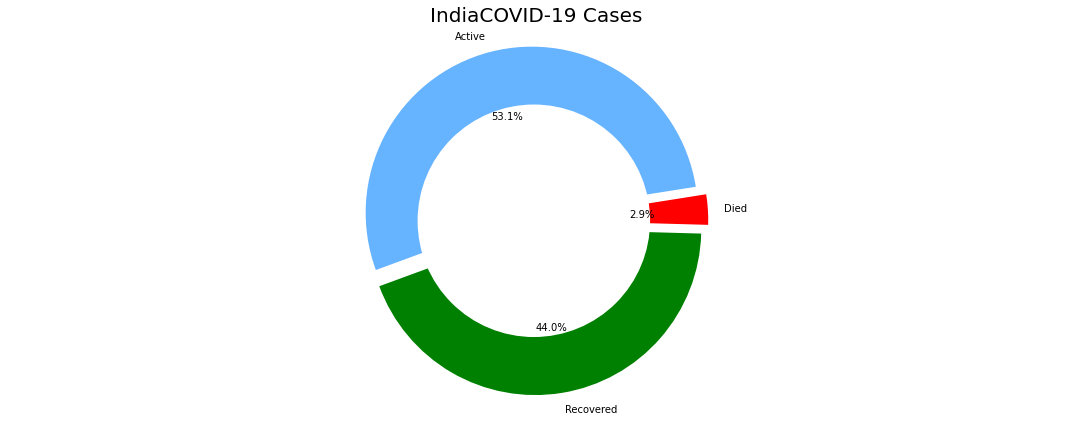

In [22]:
print("Total infected cases in India: ", total_cases_india)
print("Total cured cases in India: ", cured_cases_india)
print("Total active cases in India: ", active_cases_india)
print("Total death cases in India: ", death_cases_india)
plot_pie(active_cases_india, cured_cases_india, death_cases_india, "India")

## Visualizing the spreads geographically

In [23]:
india_coord.rename(columns = {"Name of State / UT" : "states"},inplace = True)
india_coord.columns = map(str.lower, india_coord.columns)
set(india_coord['states'].values).symmetric_difference(set(state_df['states'].values))

{'Andaman And Nicobar ',
 'Andaman and Nicobar Islands',
 'Arunachal Pradesh',
 'Arunachal Pradesh ',
 'Assam',
 'Assam ',
 'Bihar',
 'Bihar ',
 'Chandigarh',
 'Chandigarh ',
 'Chhattisgarh',
 'Chhattisgarh ',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli ',
 'Goa',
 'Goa ',
 'Gujarat',
 'Himachal Pradesh',
 'Himachal Pradesh ',
 'Jammu and Kashmir',
 'Jharkhand',
 'Jharkhand ',
 'Ladakh',
 'Lakshadweep ',
 'Madhya Pradesh',
 'Madhya Pradesh ',
 'Manipur',
 'Manipur ',
 'Meghalaya',
 'Meghalaya ',
 'Mizoram',
 'Mizoram ',
 'Nagaland',
 'Nagaland ',
 'Odisha',
 'Orissa ',
 'Puducherry',
 'Puducherry ',
 'Sikkim',
 'Sikkim ',
 'Tripura',
 'Tripura ',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh',
 'West Bengal',
 'West Bengal '}

In [24]:
india_coord['states'] = india_coord['states'].str.strip()
state_df['states'] = state_df['states'].str.strip()

set(india_coord['states'].values).symmetric_difference(set(state_df['states'].values))

{'Andaman And Nicobar',
 'Andaman and Nicobar Islands',
 'Dadar Nagar Haveli',
 'Dadra And Nagar Haveli',
 'Gujarat',
 'Jammu and Kashmir',
 'Ladakh',
 'Lakshadweep',
 'Odisha',
 'Orissa',
 'Union Territory of Jammu and Kashmir',
 'Union Territory of Ladakh'}

In [25]:
india_coord[india_coord.states == 'Gujarat']

Empty DataFrame
Columns: [states, latitude, longitude]
Index: []

In [26]:
state_df[state_df.states == 'Gujarat']

states       date cured deaths confirmed new_cases
3  Gujarat 2020-05-29  7549    938     15195         0

In [27]:
india_coord.loc[india_coord.shape[0]] = ['Gujarat','22.2587','71.1924']
india_coord

states latitude longitude
0                    Andaman And Nicobar   11.667    92.736
1                         Andhra Pradesh  14.7504     78.57
2                      Arunachal Pradesh  27.1004   93.6166
3                                  Assam    26.75   94.2167
4                                  Bihar  25.7854     87.48
5                             Chandigarh    30.72     76.78
6                           Chhattisgarh  22.0904     82.16
7                 Dadra And Nagar Haveli  20.2666   73.0166
8                                  Delhi    28.67     77.23
9                                    Goa   15.492    73.818
10                               Haryana    28.45     77.02
11                      Himachal Pradesh     31.1   77.1666
12  Union Territory of Jammu and Kashmir    33.45     76.24
13                             Jharkhand  23.8004     86.42
14                             Karnataka  12.5704     76.92
15                                Kerala  8.90037     76.57
16                           Lakshadweep  10.5626   72.6369
17                        Madhya Pradesh  21.3004     76.13
18                           Maharashtra  19.2502   73.1602
19                               Manipur     24.8     93.95
20                             Meghalaya  25.5705     91.88
21                               Mizoram  23.7104     92.72
22                              Nagaland   25.667   94.1166
23                                Orissa  19.8204      85.9
24                            Puducherry   11.935     79.83
25                                Punjab    31.52     75.98
26                             Rajasthan    26.45     74.64
27                                Sikkim  27.3333   88.6166
28                             Telengana  18.1124   79.0193
29                            Tamil Nadu  12.9204     79.15
30                               Tripura  23.8354     91.28
31                         Uttar Pradesh     27.6     78.05
32                           Uttarakhand  30.3204     78.05
33                           West Bengal  22.5804   88.3299
34             Union Territory of Ladakh     34.1     77.34
35                               Gujarat  22.2587   71.1924

In [28]:
india_coord['states'] = np.where(india_coord['states'] == "Andaman And Nicobar", 
                                        "Andaman and Nicobar Islands",india_coord['states'])
india_coord['states'] = np.where(india_coord['states'] == "Union Territory of Jammu and Kashmir", 
                                        "Jammu and Kashmir",india_coord['states'])
india_coord['states'] = np.where(india_coord['states'] == "Union Territory of Ladakh", 
                                        "Ladakh",india_coord['states'])
india_coord['states'] = np.where(india_coord['states'] == "Orissa", 
                                        "Odisha",india_coord['states'])
india_coord['states'] = np.where(india_coord['states'] == "Dadra And Nagar Haveli", 
                                        "Dadar Nagar Haveli",india_coord['states'])

In [29]:
set(india_coord['states'].values).symmetric_difference(set(state_df['states'].values))

{'Lakshadweep'}

In [30]:
df_full = pd.merge(india_coord,state_df,on='states').reset_index(drop = True)
df_full.head()

states latitude longitude       date cured deaths  \
0  Andaman and Nicobar Islands   11.667    92.736 2020-05-29    33      0   
1               Andhra Pradesh  14.7504     78.57 2020-05-29  2057     58   
2            Arunachal Pradesh  27.1004   93.6166 2020-05-29     1      0   
3                        Assam    26.75   94.2167 2020-05-29    87      4   
4                        Bihar  25.7854     87.48 2020-05-29  1083     15   

  confirmed new_cases  
0        33         0  
1      3171         0  
2         2         0  
3       781         0  
4      3061         0

In [31]:
map = folium.Map(location=[20, 70], zoom_start=4,tiles='OpenStreetMap')

for lat, lon, value, name in zip(df_full['latitude'], df_full['longitude'], df_full['confirmed'], df_full['states']):
    folium.CircleMarker([lat, lon], radius=value*0.0015, popup = ('<strong>State</strong>: ' + str(name).capitalize() +
                                                                  '<br>''<strong>Total Cases</strong>: ' + str(value) + 
                                                                  '<br>'),color='red',fill_color='red',fill_opacity=0.3 ).add_to(map)
map

## Trend of virus

In [32]:
df_daywise_india = df_final_india.groupby("date")['confirmed','cured','deaths',"new_cases"].sum().reset_index()
df_daywise_india

date  confirmed    cured  deaths  new_cases
0   2020-01-31        1.0      0.0     0.0        0.0
1   2020-02-01        2.0      0.0     0.0        1.0
2   2020-02-02        3.0      0.0     0.0        1.0
3   2020-02-03        3.0      0.0     0.0        0.0
4   2020-02-04        3.0      0.0     0.0        0.0
..         ...        ...      ...     ...        ...
115 2020-05-25   136203.0  57721.0  4021.0     6673.0
116 2020-05-26   142410.0  60491.0  4167.0     6207.0
117 2020-05-27   147754.0  64426.0  4337.0     5344.0
118 2020-05-28   154001.0  67692.0  4531.0     6247.0
119 2020-05-29   154001.0  67692.0  4531.0        0.0

[120 rows x 5 columns]

In [33]:
fig = go.Figure()
fig.add_trace(go.Scatter(x=df_daywise_india['date'], y = df_daywise_india['confirmed'], mode='lines+markers',name='Total Cases'))
fig.update_layout(title_text='Trend of Coronavirus Cases in India (Cumulative cases)',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [34]:
fig = px.bar(df_daywise_india, x="date", y="new_cases", barmode='group', height=400)
fig.update_layout(title_text='Coronavirus Cases in India on daily basis',plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [35]:
fig = px.bar(df_daywise_india, x="date", y="confirmed", color='confirmed', orientation='v', height=600,
             title='Confirmed Cases in India', color_discrete_sequence = px.colors.cyclical.IceFire)

fig.update_layout(plot_bgcolor='rgb(230, 230, 230)')
fig.show()

In [36]:
fig = px.line(x=df_daywise_india['date'], y=df_daywise_india['new_cases'], labels = {'x': "Dates",'y': "Counts"})
fig.update_layout( showlegend=False,title_text="Trend of Coronavirus cases")
fig.update_layout(plot_bgcolor='rgb(250, 242, 242)')
fig.show()